In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [49]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
0        2023-12-25       0   ST-1718   ST-2047      1        7      1363
1        2023-12-25       0   ST-2040   ST-1351      1        5       756
2        2023-12-25       0    ST-528    ST-518      1       14      2086
3        2023-12-25       0   ST-2031   ST-2965      1        9      1578
4        2023-12-25       0    ST-829   ST-2054      1       34      2680
...             ...     ...       ...       ...    ...      ...       ...
1772057  2024-01-16    2345    ST-525   ST-2481      1        3       600
1772058  2024-01-16    2345    ST-834    ST-528      1       11      2267
1772059  2024-01-16    2350   ST-1352   ST-1676      1        6       845
1772060  2024-01-16    2350   ST-2994    ST-517      1        3       448
1772061  2024-01-16    2350    ST-513   ST-2482      1        3       710

[1772062 rows x 7 columns]


In [50]:
condition = 강서_데이터['시작_대여소_ID'] == 'ST-1718'

a = 강서_데이터[condition].groupby('기준_날짜')['전체_건수'].sum()

print(a)

기준_날짜
2023-04-03    421
2023-04-05     56
2023-04-10    362
2023-04-11    355
2023-04-14    434
             ... 
2024-03-18    350
2024-03-19    353
2024-03-21    388
2024-03-25    249
2024-03-27    390
Name: 전체_건수, Length: 127, dtype: int64


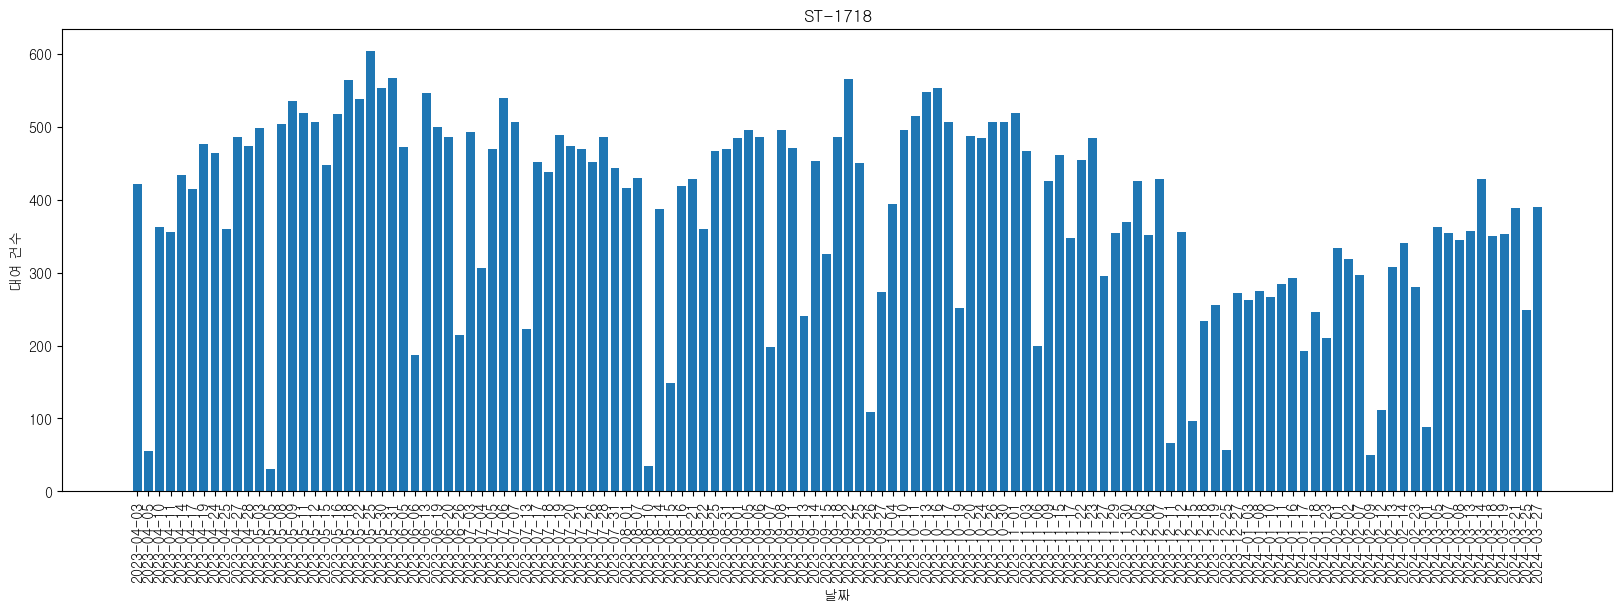

In [58]:
# ['시작_대여소_ID'] == 'ST-1718' 의 일일 대여량 >> 127일치(데이터 분할)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(a.index, a.values)
plt.title('ST-1718')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)

# plt.xlim(0, len(a))

plt.show()

위의 그래프

In [52]:
condition2 = 강서_데이터['종료_대여소_ID'] == 'ST-1718'

b = 강서_데이터[condition2].groupby('기준_날짜')['전체_건수'].sum()

print(b)

기준_날짜
2023-04-03    416
2023-04-05     55
2023-04-10    362
2023-04-11    351
2023-04-14    428
             ... 
2024-03-18    329
2024-03-19    349
2024-03-21    379
2024-03-25    240
2024-03-27    378
Name: 전체_건수, Length: 127, dtype: int64


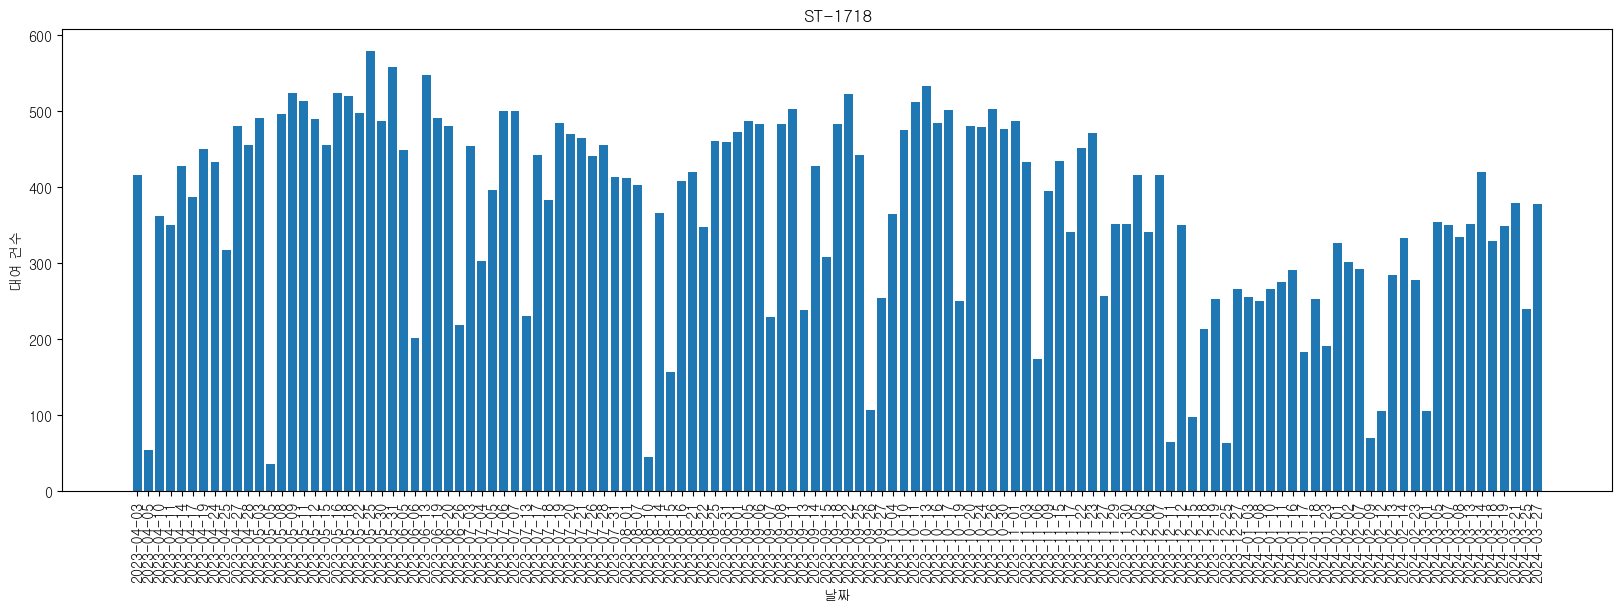

In [57]:
# ['종료_대여소_ID'] == 'ST-1718' 의 일일 대여량 >> 127일치(데이터 분할)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(b.index, b.values)
plt.title('ST-1718')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)

# plt.xlim(0, len(a))

plt.show()

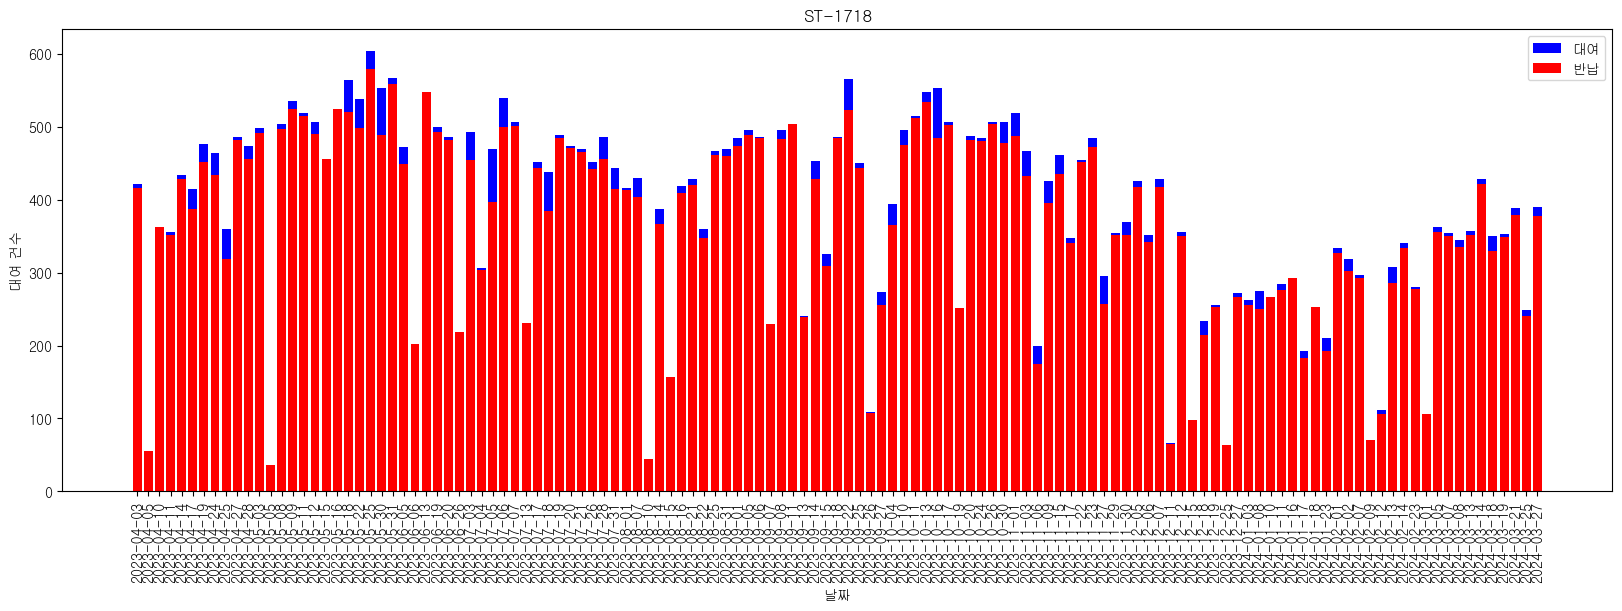

In [56]:
# 겹쳐그리기
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(a.index, a.values, label = '대여', color = 'blue')
ax.bar(b.index, b.values, label = '반납', color = 'red')
plt.title('ST-1718')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.legend(loc='best')

# plt.xlim(0, len(a))

plt.show()